<h2> Building a maultivariable regressor using crime data in New York State in 2013 and 2014, provided by the FBI: UCR.
Train, Test and Validate</h2> 

In [142]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline

In [143]:
# Grab and process the cleaned data
path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/NY Crime/NY_Crime_2013_cleaned.csv")
path2 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/NY Crime/NY_Crime_2014_cleaned.csv")
df_2013 = pd.read_csv(path1)
df_2014 = pd.read_csv(path2)

In [144]:
df_2013.dtypes, df_2014.dtypes

(City            object
 prop             int64
 pop              int64
 murd             int64
 rob              int64
 violent          int64
 assul            int64
 burg             int64
 theft            int64
 motor            int64
 pop_log        float64
 murd_binary      int64
 rob_binary       int64
 dtype: object, City            object
 prop             int64
 pop              int64
 murd             int64
 rob              int64
 violent          int64
 assul            int64
 burg             int64
 theft            int64
 motor            int64
 pop_log        float64
 murd_binary      int64
 rob_binary       int64
 dtype: object)

In [145]:
cols1 = [col for col in df_2013.columns if col not in ['City']]

In [146]:
cols2 = [col for col in df_2014.columns if col not in ['City']]

In [147]:
def coerce_df_columns_to_numeric(df, cols1):
    df[cols1] = df[cols1].apply(pd.to_numeric, errors='coerce')

In [148]:
def coerce_df_columns_to_numeric(df, cols2):
    df[cols2] = df[cols2].apply(pd.to_numeric, errors='coerce')

In [149]:
df_2013[cols1] = df_2013[cols1].astype('float64')

In [150]:
df_2013.dtypes, df_2014.dtypes

(City            object
 prop           float64
 pop            float64
 murd           float64
 rob            float64
 violent        float64
 assul          float64
 burg           float64
 theft          float64
 motor          float64
 pop_log        float64
 murd_binary    float64
 rob_binary     float64
 dtype: object, City            object
 prop             int64
 pop              int64
 murd             int64
 rob              int64
 violent          int64
 assul            int64
 burg             int64
 theft            int64
 motor            int64
 pop_log        float64
 murd_binary      int64
 rob_binary       int64
 dtype: object)

In [151]:
df_2013.head(3), df_2014.head(3)

(                       City  prop     pop  murd  rob  violent  assul  burg  \
 0             Adams Village  12.0  1861.0   0.0  0.0      0.0    0.0   2.0   
 1  Addison Town and Village  24.0  2577.0   0.0  0.0      3.0    3.0   3.0   
 2             Akron Village  16.0  2846.0   0.0  0.0      3.0    3.0   1.0   
 
    theft  motor   pop_log  murd_binary  rob_binary  
 0   10.0    0.0  7.528869          0.0         0.0  
 1   20.0    1.0  7.854381          0.0         0.0  
 2   15.0    0.0  7.953670          0.0         0.0  ,
                        City  prop   pop  murd  rob  violent  assul  burg  \
 0             Adams Village    11  1851     0    0        0      0     1   
 1  Addison Town and Village    49  2568     0    1        2      1     1   
 2            Afton Village4     1   820     0    0        0      0     0   
 
    theft  motor   pop_log  murd_binary  rob_binary  
 0     10      0  7.523481            0           0  
 1     47      1  7.850883            0        

In [152]:
# Check to see if any missing data 
df_2013.isnull().sum(), df_2014.isnull().sum()

(City           0
 prop           0
 pop            0
 murd           0
 rob            0
 violent        0
 assul          0
 burg           0
 theft          0
 motor          0
 pop_log        0
 murd_binary    0
 rob_binary     0
 dtype: int64, City           0
 prop           0
 pop            0
 murd           0
 rob            0
 violent        0
 assul          0
 burg           0
 theft          0
 motor          0
 pop_log        0
 murd_binary    0
 rob_binary     0
 dtype: int64)

In [153]:
# Propertycrime = α + Population + Population2 + Murder + Robbery + etc.
cols_2013 = [col for col in df_2013.columns if col not in ['City','prop', 'murd', 'rob', 'pop', 'pop_log', 'violent']]
cols_2014 = [col for col in df_2014.columns if col not in ['City','prop', 'murd', 'rob', 'pop', 'pop_log', 'violent']]

X_2013 = df_2013.loc[:,cols_2013].copy()
X_2014 = df_2014.loc[:,cols_2014].copy()
y_2013 = df_2013.loc[:,'prop'].copy() # Property Crime
y_2014 = df_2014.loc[:,'prop'].copy() # Property Crime

In [154]:
# Training data 
X_train, y_train = X_2013, y_2013 
# Test data 
X_test, y_test = X_2014, y_2014 

In [155]:
import pandas as pd  
from sklearn.model_selection import train_test_split        

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = y_train
X = X_train
Y1 = y_test
X1 = X_test

In [156]:
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [157]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  2.80147375e-15   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.32296755e-14   3.07160899e-13]

Intercept: 
 -4.54747350886e-13

R-squared:
1.0


<h2> We have overfitting problem and later we will use PCA to reduce the dimensions and try again
</h2>

In [158]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = Y

In [159]:
# Calculate the error, also called the residual.
residual = actual - predicted

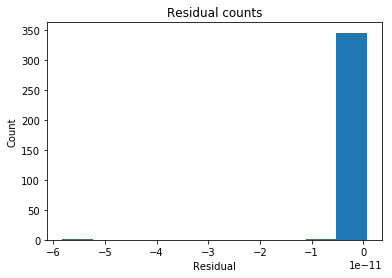

In [160]:
# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [161]:
# Prepare for PCA

from sklearn.datasets import load_boston
from sklearn.decomposition import PCA    # The object responsible for performing PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
pca = PCA(n_components=2)    # A two-dimensional representation of the dataset
X_pca_train = pca.fit_transform(X)
X_pca_train[:5]

array([[ -648.11950324,   -40.90574056],
       [ -637.60374292,   -41.36635783],
       [ -642.71254829,   -43.09204622],
       [ 2678.79469041,   286.81694104],
       [ -488.72324122,    -6.24581521]])

<h2> Using statsmodels try to modele new reduced feature vectors
</h2>

In [181]:
import statsmodels.api as sm
sm_OLS_test = sm.OLS(Y, X_pca_train ) 

In [182]:
full_res = sm_OLS_test.fit() 
print ("\n \n",full_res.summary()) 


 
                             OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.610e+04
Date:                Wed, 25 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:21:04   Log-Likelihood:                -2816.9
No. Observations:                 348   AIC:                             5638.
Df Residuals:                     346   BIC:                             5645.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1523      0.006    179.408     

<h2> Overfitting risk is now reduced and lets try to test the model on 2014 dataset</h2> 

In [183]:
pca = PCA(n_components=2)    # A two-dimensional representation of the dataset
X_pca_test = pca.fit_transform(X1)
X_pca_test[:5]

array([[ -572.07309737,   -37.22018504],
       [ -536.52108073,   -37.66755633],
       [ -580.77730863,   -38.06241368],
       [ -565.28101085,   -38.58459858],
       [ 2588.4635484 ,   326.25362088]])

In [184]:
predicted2 = full_res.predict(X_pca_test)

In [185]:
predicted2.shape

(368,)

In [186]:
actual2 = Y1

In [187]:
actual2.shape

(368,)

In [188]:
# Calculate the error, also called the residual.
residual2 = actual2 - predicted2

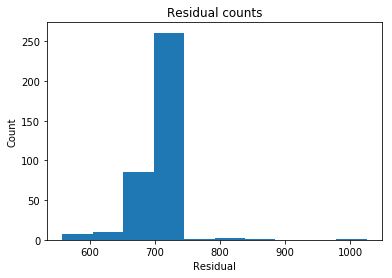

In [179]:
# This looks a bit concerning.
plt.hist(residual2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()